# Fairness attributes in Sepectral clustering

In [9]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import time
from sklearn.metrics import pairwise_distances

In [2]:
#importing dataset
dataset=pd.read_csv('bank.csv')
list(dataset)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

# Taking marital status as sensitive attribute

In [3]:
#taking few attributes under consideration
df = dataset[['age','balance','marital','duration']].copy()
df

,age,balance,marital,duration
0,30,1787,married,79
1,33,4789,married,220
2,35,1350,single,185
3,30,1476,married,199
4,59,0,married,226
...,...,...,...,...
4516,33,-333,married,329
4517,57,-3313,married,153
4518,57,295,married,151
4519,28,1137,married,129


In [4]:
#giving binary values to marital_status
marital=[]
for i in range(len(df)):
    if df.loc[i,'marital']=='married':
        marital.append(1)
    else:
        marital.append(0);
df['marital_status']=marital

In [5]:
df = df.drop('marital', axis=1)
df

,age,balance,duration,marital_status
0,30,1787,79,1
1,33,4789,220,1
2,35,1350,185,0
3,30,1476,199,1
4,59,0,226,1
...,...,...,...,...
4516,33,-333,329,1
4517,57,-3313,153,1
4518,57,295,151,1
4519,28,1137,129,1


# Why PCA
There are varying reasons for using a dimensionality reduction step such as PCA prior to data segmentation. 
#Chief among them? By reducing the number of features, we’re improving the performance of our algorithm. On 
#top of that, by decreasing the number of features the noise is also reduced.

In [89]:
spectral_dataset=df

In [90]:
#dimension reduction for better representation of data
scalar = StandardScaler()
scalar.fit(spectral_dataset)
scaled_data = scalar.transform(spectral_dataset)
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data = pca.transform(scaled_data)  
data.shape

(4521, 2)

In [91]:
#calculating similarity matrix for the dataset
W = pairwise_distances(data, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
#avoiding fully connected graph
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [92]:
# degree matrix
D = np.diag(np.sum(W, axis=1))
D

array([[4484,    0,    0, ...,    0,    0,    0],
       [   0, 4489,    0, ...,    0,    0,    0],
       [   0,    0, 4483, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 4496,    0,    0],
       [   0,    0,    0, ...,    0, 4493,    0],
       [   0,    0,    0, ...,    0,    0, 4504]])

In [93]:
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

laplacian matrix:
[[4483   -1   -1 ...   -1   -1   -1]
 [  -1 4488   -1 ...   -1   -1   -1]
 [  -1   -1 4482 ...   -1   -1   -1]
 ...
 [  -1   -1   -1 ... 4495   -1   -1]
 [  -1   -1   -1 ...   -1 4492   -1]
 [  -1   -1   -1 ...   -1   -1 4503]]


In [94]:
#eigen value and eigen vectors of laplacian matrix
e, v = np.linalg.eig(L)
e = e.real
v = v.real

In [174]:
#combining all the eigen vectors into a matrix U
U=[]
clusters=7
for i in range(clusters):
    U.append(v[i])
U=np.array(U)
U.shape

(7, 4521)

In [175]:
U=U.T
U.shape

(4521, 7)

In [176]:
U

array([[-2.34715835e-04, -2.34700310e-04, -2.34687555e-04, ...,
        -2.34644065e-04, -2.34698987e-04, -2.34560200e-04],
       [-1.48724578e-02, -1.48724578e-02, -1.48724578e-02, ...,
        -1.48724578e-02, -1.48724578e-02, -1.48724578e-02],
       [ 2.22524842e-04,  2.22524046e-04,  2.22526260e-04, ...,
         2.22524279e-04,  2.22526217e-04,  2.22525989e-04],
       ...,
       [-1.58750120e-14, -2.78608363e-14,  7.70518794e-15, ...,
        -1.88366259e-03, -2.02739667e-14, -7.63084920e-15],
       [ 2.02968113e-14, -1.41908194e-14,  6.76574380e-14, ...,
         4.63741369e-03,  4.43132019e-14,  3.59302756e-14],
       [-1.68617838e-14, -2.55743584e-14,  3.85987573e-15, ...,
        -2.24370644e-03, -2.12816148e-14, -1.39828472e-14]])

In [177]:
#creating a k-means object
k_Means_Obj=KMeans(n_clusters=7)
start = time.time()
k_Means_Obj.fit(U)
end = time.time()

In [196]:
clusters_cen=k_Means_Obj.cluster_centers_
clusters_cen

array([[-4.01453570e-05,  4.15362020e-05, -1.17246157e-04,
         7.94021765e-05, -8.50354666e-05, -1.12814187e-04,
         1.98730391e-04],
       [ 6.89717462e-13,  6.55757214e-13,  4.55185504e-13,
         7.55453493e-13,  8.77552640e-01,  1.86992972e-13,
         1.79473325e-13],
       [ 1.03694180e-13,  1.67720818e-13,  1.87182301e-13,
         2.88494136e-13,  5.40058260e-13,  6.15696459e-14,
        -6.12707438e-01],
       [-1.44767422e-06, -9.69083647e-06, -1.76296183e-04,
        -8.84927189e-06, -5.85591371e-06,  5.05761431e-01,
        -5.17617677e-07],
       [-2.94937219e-11,  9.12862252e-01, -6.20722516e-12,
        -7.72102374e-12,  1.29649979e-11, -5.21555057e-12,
        -3.24944944e-12],
       [ 8.16484925e-01,  4.53950693e-12,  1.48130661e-12,
         1.22329054e-13,  7.19664386e-13,  1.22715984e-12,
        -7.83742239e-14],
       [ 5.48408681e-06, -1.30613648e-05,  5.67653033e-01,
        -2.82223627e-06, -6.18453564e-06,  1.39199244e-04,
        -6.2049790

In [179]:
#final clusters
final=k_Means_Obj.fit_predict(U)
#assigned cluster number
with np.printoptions(threshold=np.inf):
    print(final)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [180]:
#we have two groups vis married(m) and unmarried(u)
#separating every clusters datapoints
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
cluster6=[]
cluster7=[]
for i in range(len(final)):
    if final[i]==0:
        cluster1.append(i)
    elif final[i]==1:
        cluster2.append(i)
    elif final[i]==2:
        cluster3.append(i)
    elif final[i]==3:
        cluster4.append(i)
    elif final[i]==4:
        cluster5.append(i)
    elif final[i]==5:
        cluster6.append(i)
    elif final[i]==6:
        cluster6.append(i)
clusters = [cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7]
clusters = np.array(clusters)
clusters

C:\Users\NEHA\AppData\Local\Temp/ipykernel_4400/1987913234.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


array([list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [189]:
#stores the count of married in the entire dataset
rm=0
ru=0
married=[]
unmarried=[]
for i in range(len(spectral_dataset)):
    if spectral_dataset.loc[i,'marital_status']==1:
        rm+=1
        married.append(U[i])
    else:
        ru+=1
        unmarried.append(U[i])
print(rm,ru)

2797 1724


In [208]:
#number of married and unmarried datapoints in clusters
rm_clusters=[]
ru_clusters=[]
for i in range (len(clusters)):
    rm_clusters.append(0)
    ru_clusters.append(0)
for i in range (len(clusters)):
    for j in range (len(clusters[i])):
        if spectral_dataset.loc[clusters[i][j],'marital_status']==1:
            rm_clusters[i]+=1
        else:
            ru_clusters[i]+=1
rm_clusters+ru_clusters

[2794, 1, 1, 1, 0, 0, 0, 1718, 0, 0, 2, 1, 3, 0]

In [183]:
#calculatong balance
#for protected group married
R1=[]
R1_reciprocal=[]
for i in range (len(clusters)):
    if(rm_clusters[i]==0):
        R1.append(1)
        R1_reciprocal.append(0)
    else:
        R1.append(rm/rm_clusters[i])
        R1_reciprocal.append(rm_clusters[i]/rm)

In [184]:
#calculatong balance
#for protected group unmarried
R2=[]
R2_reciprocal=[]
for i in range (len(clusters)):
    if(ru_clusters[i]==0):
        R2.append(1)
        R2_reciprocal.append(0)
    else:
        R2.append(ru/ru_clusters[i])
        R2_reciprocal.append(ru_clusters[i]/ru)

# Balance
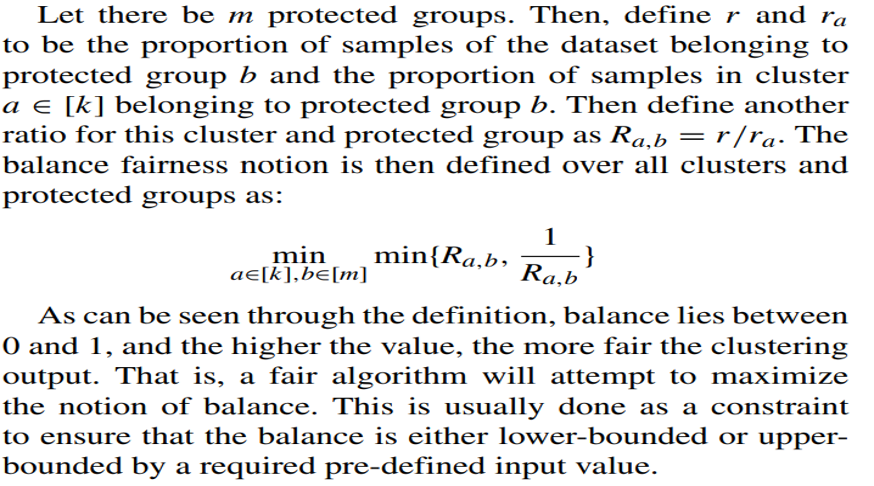

In [185]:
Balance=2
for i in range (len(R1)):
    Balance=min(Balance,R1[i],R1_reciprocal[i])
for i in range (len(R2)):
    Balance=min(Balance,R2[i],R2_reciprocal[i]) 
print(Balance)
print("Strictly unbalanced")

0
Strictly unbalanced


In [197]:
clusters_cen[6][6]

-6.204979064043702e-07

In [202]:
#calculating sum of cost of married datasets from the clusters
dism=0
for i in range(len(married)):
    dis=0;
    for j in range(len(clusters_cen)):
        for k in range(len(clusters_cen[j])):
            dis+=((married[i][k]-clusters_cen[j][k])*(married[i][k]-clusters_cen[j][k]))
    dism+=pow(dis,0.5)
#calculating sum of cost of unmarried datasets from the clusters
disum=0
for i in range(len(unmarried)):
    dis=0;
    for j in range(len(clusters_cen)):
        for k in range(len(clusters_cen[j])):
            dis+=((unmarried[i][k]-clusters_cen[j][k])*(unmarried[i][k]-clusters_cen[j][k]))
    disum+=pow(dis,0.5)

# Social fairness
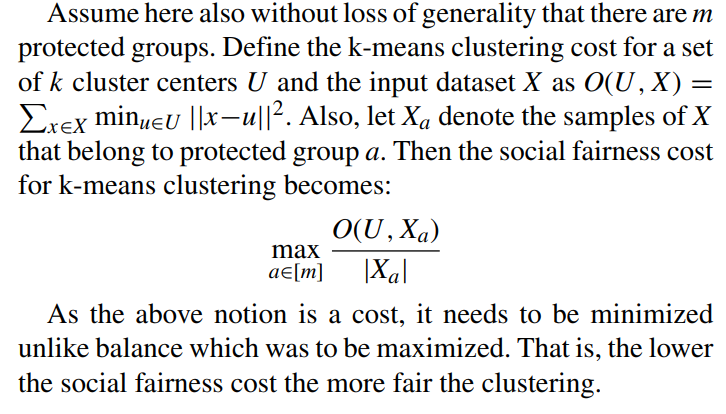

In [204]:
social_fairness=max(dism/len(married),disum/len(unmarried))
social_fairness

1.7992901770007137

# Bounded Representation
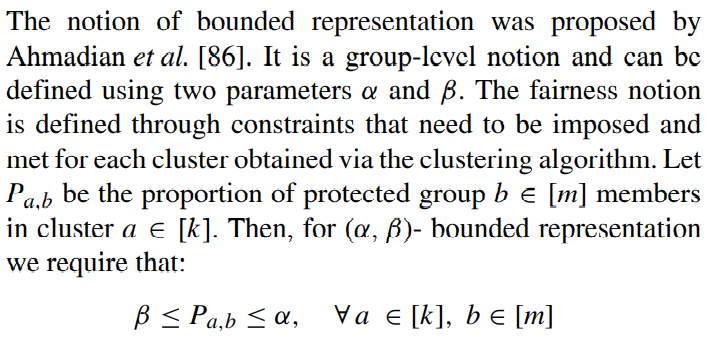

In [215]:
Pm=[]
for i in range(len(clusters)):
    if len(clusters[i])==0:
        Pm.append(0)
    else:
        Pm.append(rm_clusters[i]/len(clusters[i]))
Pum=[]
for i in range(len(clusters)):
    if len(clusters[i])==0:
        Pum.append(0)
    else:
        Pum.append(ru_clusters[i]/len(clusters[i]))
Pm+Pum

[0.6192375886524822,
 1.0,
 1.0,
 0.3333333333333333,
 0.0,
 0.0,
 0,
 0.3807624113475177,
 0.0,
 0.0,
 0.6666666666666666,
 1.0,
 1.0,
 0]

In [217]:
1/len(clusters)

0.14285714285714285

In [218]:
print("As all the clusters are not satisfying alpha and beta bound values so the clustering is highly unfair")

As all the clusters are not satisfying alpha and beta bound values so the clustering is highly unfair


# Max Fairness Cost
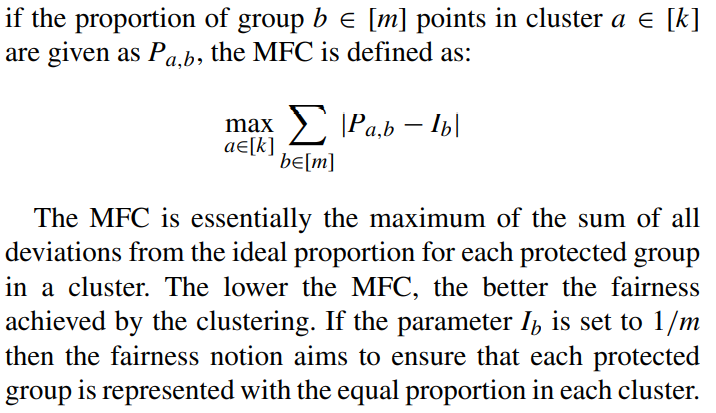

In [220]:
Max_fairness_cost=0
for i in range(len(clusters)):
    Max_fairness_cost=max(Max_fairness_cost,abs(Pm[i]-1/len(clusters))+abs(Pum[i]-1/len(clusters)))
Max_fairness_cost

1.0

In [221]:
print("max fairness cost is also very high hence the clustering is highly unfair")

max fairness cost is also very high hence the clustering is highly unfair
